In [1]:
import lenstronomy.Util.data_util as data_util
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from glob import glob
from hydra import initialize, compose
from lenstronomy.Plots import plot_util
from lenstronomy.SimulationAPI.ObservationConfig import HST, LSST, Roman, DES, Euclid
from lenstronomy.SimulationAPI.sim_api import SimAPI
from pprint import pprint
from scipy.stats import truncnorm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import overplot, plot
from mejiro.lenses.test import SampleStrongLens
from mejiro.helpers import pyhalo, lenstronomy_sim, pandeia_input, bkg
from mejiro.helpers.roman_params import RomanParameters

In [2]:
band = 'F106'
lens = SampleStrongLens()
model = lens.get_array(num_pix=45, side=4.95, band=band)

In [3]:
loc = 1.5
scale = 0.2
clip_a = 1.
clip_b = 2.
a = (clip_a - loc) / scale
b = (clip_b - loc) / scale
dist = truncnorm(a=a, b=b, loc=loc, scale=scale)
multiplier = dist.rvs(size=1)[0]

(array([ 179.,  471.,  921., 1464., 1962., 1851., 1574.,  956.,  458.,
         164.]),
 array([1.00149444, 1.10116916, 1.20084388, 1.3005186 , 1.40019332,
        1.49986804, 1.59954276, 1.69921748, 1.7988922 , 1.89856692,
        1.99824164]),
 <BarContainer object of 10 artists>)

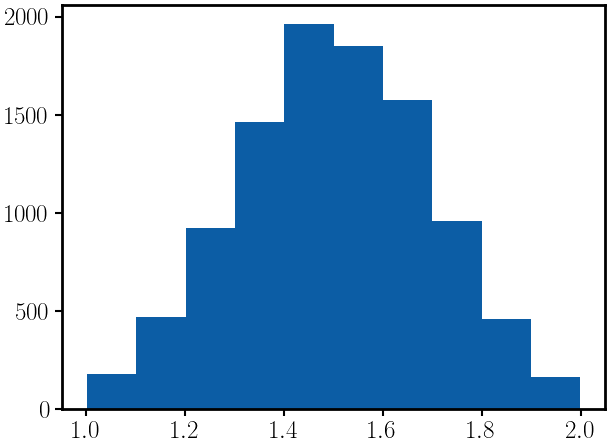

In [4]:
plt.hist(dist.rvs(size=10000))

In [5]:
import mejiro

module_path = os.path.dirname(mejiro.__file__)
csv_path = os.path.join(module_path, 'data', 'roman_spacecraft_and_instrument_parameters.csv')
params = RomanParameters(csv_path)
min_count_rate = params.get_min_zodi_count_rate(band)
baseline = np.ones(model.shape) * min_count_rate * multiplier

In [6]:
roman_band = Roman.Roman(band=band.upper(), psf_type='PIXEL', survey_mode='wide_area')
kwargs_band = roman_band.kwargs_single_band()
sigma_bkg = data_util.bkg_noise(readout_noise=0, exposure_time=kwargs_band['exposure_time'],
                                sky_brightness=kwargs_band['sky_brightness'], pixel_scale=kwargs_band['pixel_scale'],
                                num_exposures=1)
print(sigma_bkg)

0.04365015024531251


In [7]:
seed = 42
if seed is not None:
    g = np.random.RandomState(seed=seed)
else:
    g = np.random
nx, ny = np.shape(model)
noise = np.zeros_like(model)
noise += g.randn(nx, ny) * sigma_bkg

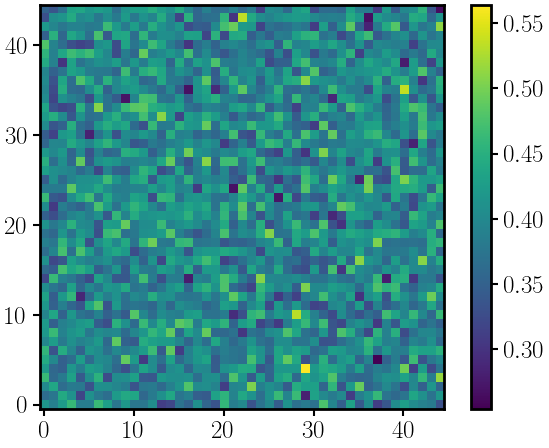

In [8]:
plot.plot(noise + baseline, colorbar=True)

0.04365015024531251
0.04365015024531251
0.04365015024531251
0.04365015024531251
0.04365015024531251
0.04365015024531251
0.04365015024531251
0.04365015024531251
0.04365015024531251
0.04365015024531251


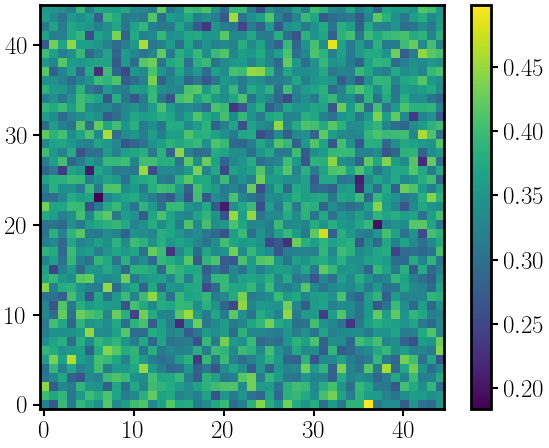

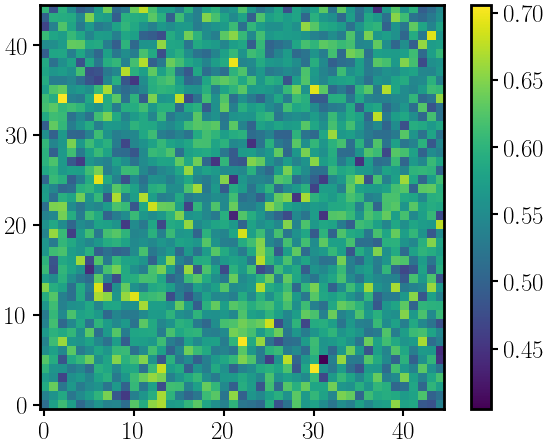

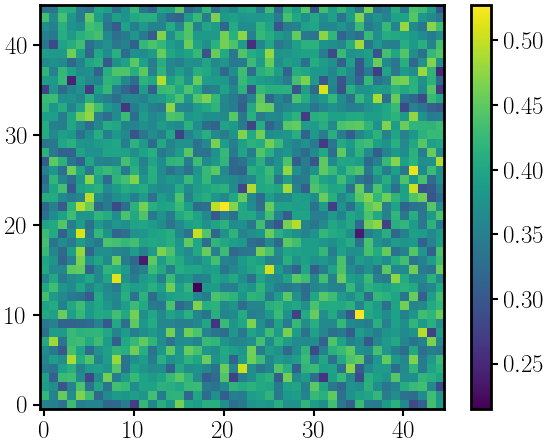

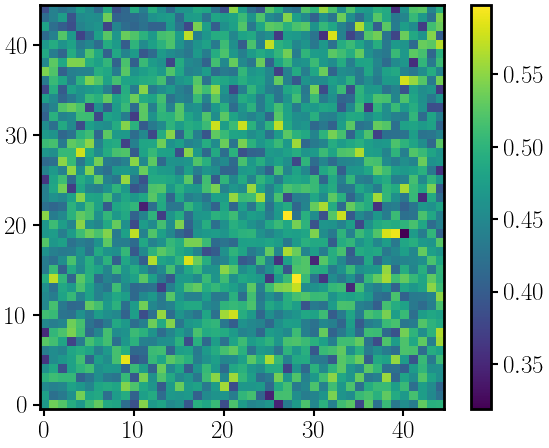

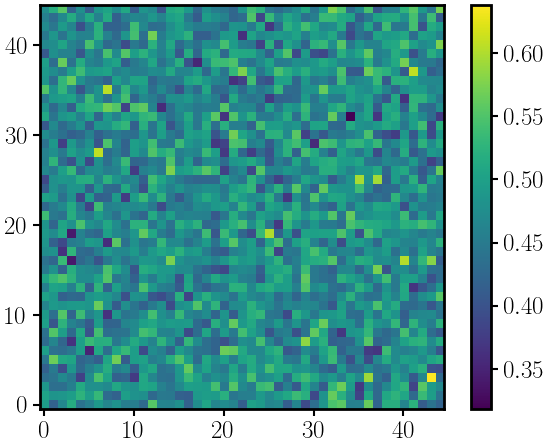

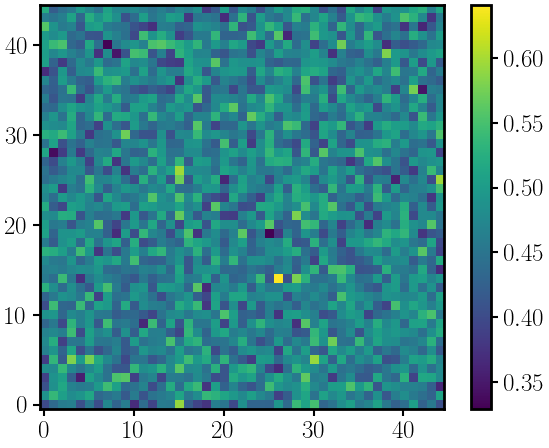

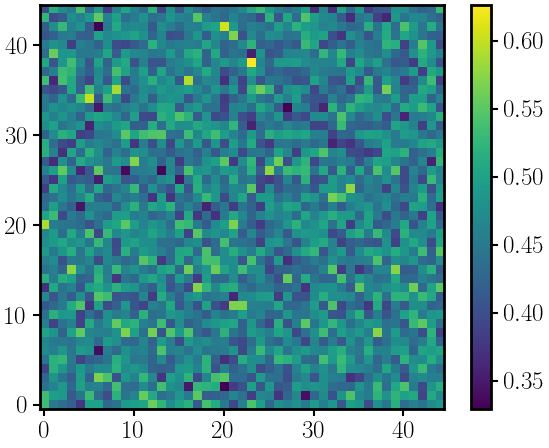

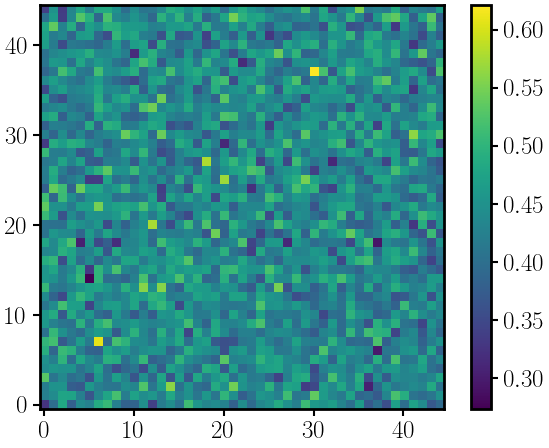

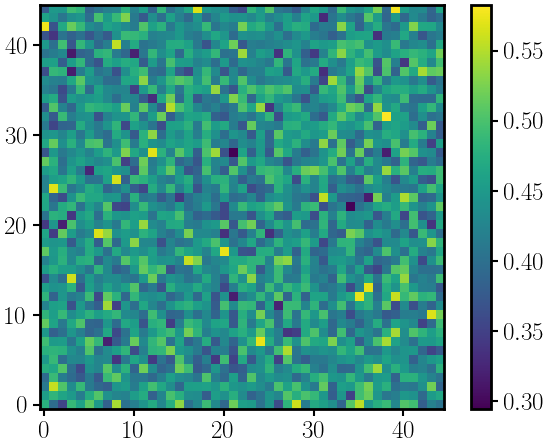

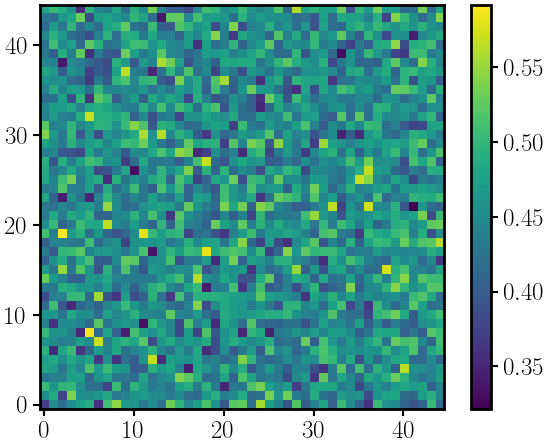

In [9]:
bkg_list = []
for i in range(10):
    bkg_list.append(bkg.get_high_galactic_lat_bkg(model, band, seed=None))

for i in range(10):
    plot.plot(bkg_list[i], colorbar=True)